In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_source_json(filename):
    directory = os.path.join(os.path.pardir, "data", filename)
    with open(directory, "r", encoding="utf-8") as f:
        json_file = json.load(f)
    return json_file
result_info = get_source_json("parser_result_info.json")["RECORDS"]
len(result_info)
gold_adv = [int(e) for e in result_info[0]["radiant_gold_adv"].strip("[]").split(", ")]
sum_gold_adv = sum(gold_adv)
print(gold_adv[0], sum_gold_adv)

-136 -44142


In [3]:
def get_win_rate(start_time, end_time, result_info):
    win_rate = []
    for match in result_info:
        gold_adv = [int(e) for e in match["radiant_gold_adv"].strip("[]").split(", ")]
        end = end_time if (end_time < len(gold_adv)) else len(gold_adv)
        win_rate.append(sum(gold_adv[start_time:end]))
    return win_rate

In [4]:
win_rate = get_win_rate(0, 120 , result_info)
print(win_rate[0:10])

[-44142, 216265, -364155, -141382, 539714, -199188, 48853, 337772, -260451, -97418]


/home/yaoxingliu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


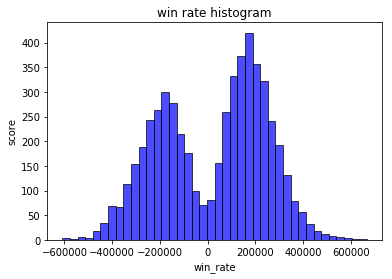

In [5]:
plt.hist(win_rate, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("win_rate")
plt.ylabel("score")
plt.title("win rate histogram")
plt.show()